# Digits Recognition using Convolutional Neural Network

In this Project CNN is applied on the Dataset of MNIST.<br>
MNIST ("Modified National Institute of Standards and Technology") is the de facto `“hello world”` dataset of computer vision.
Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.
As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## Introduction to Convolutional Neural Network (CNN)
<img src="mnist.png" alt="Alt text">
A Convolutional neural network (CNN) is a neural network that has one or more convolutional layers and are used mainly for image processing, classification, segmentation and also for other auto correlated data.

A convolution is essentially sliding a filter over the input. One helpful way to think about convolutions is this quote from Dr Prasad Samarakoon: “A convolution can be thought as “looking at a function’s surroundings to make better/accurate predictions of its outcome.”

Rather than looking at an entire image at once to find certain features it can be more effective to look at smaller portions of the image.

## Common uses for CNNs
The most common use for CNNs is image classification, for example identifying satellite images that contain roads or classifying hand written letters and digits. There are other quite mainstream tasks such as image segmentation and signal processing, for which CNNs perform well at.

CNNs have been used for understanding in Natural Language Processing (NLP) and speech recognition, although often for NLP Recurrent Neural Nets (RNNs) are used.

A CNN can also be implemented as a U-Net architecture, which are essentially two almost mirrored CNNs resulting in a CNN whose architecture can be presented in a U shape. U-nets are used where the output needs to be of similar size to the input such as segmentation and image improvement.

## Convolution Kernel
<img src="kernel.png" alt="Alt text">

Convolutional neural networks (CNNs), a kernel, also known as a filter or a convolutional filter, refers to a small matrix used to extract specific features from an input image or volume. The kernel is applied through a process called convolution, which involves sliding the kernel across the input data and performing element-wise multiplication and summation.

Each kernel is designed to capture a specific pattern or feature in the input data. For example, a kernel might be designed to detect edges, corners, or textures. The values within the kernel matrix are typically learned during the training process of the CNN.

During the convolution operation, the kernel is multiplied element-wise with the corresponding pixels or voxels of the input data, and the results are summed to produce a single output value. This process is repeated for each location in the input data, resulting in a feature map that highlights the presence of the specific feature that the kernel is designed to detect.

CNNs typically utilize multiple kernels in each layer, allowing them to detect various features simultaneously. These kernels are usually small in size, such as 3x3 or 5x5, but can vary depending on the network architecture and the complexity of the features being detected.

By applying different kernels at each layer, CNNs are capable of automatically learning hierarchical representations of the input data, starting from low-level features such as edges and gradually progressing to higher-level features and concepts. This ability to learn and extract relevant features from the input data makes CNNs particularly effective for tasks such as image recognition, object detection, and image classification.

<img src="8.png" alt="Alt text">


## Padding in CNN
<img src="9.png" alt="Alt text">

In convolutional neural networks (CNNs), padding refers to the process of adding extra border pixels around the input image or feature map before applying convolutional operations. Padding is commonly used to control the spatial dimensions of the output feature maps and to address the issue of dimensionality reduction that occurs during convolution.

When a convolution operation is applied without padding, the spatial dimensions of the output feature maps are reduced compared to the input. This reduction occurs because the kernel, or filter, cannot be centered on the pixels at the edges of the input, resulting in incomplete coverage. As a result, the output feature maps have smaller spatial dimensions.

Padding is used to address this issue by adding extra pixels around the input, effectively increasing its size. These additional pixels are typically filled with zeros, which is known as zero-padding. The padding ensures that the kernel can be properly centered on all pixels, including those at the edges of the input.
<br><br>
Padding in CNNs offers several benefits:
<br><br>
1. Preservation of spatial information: Padding helps retain the spatial dimensions of the input throughout the convolutional layers, allowing the network to capture and preserve more spatial information.

2. Mitigation of border effects: Padding mitigates the border effects that occur when convolutions are applied near the edges of the input. Without padding, pixels near the edges would have fewer connections and receive less attention from the network.

3. Alignment of input and output: By using padding, the input and output feature maps can have the same spatial dimensions, simplifying the architecture and calculations in subsequent layers.

4. Enhanced receptive field: Padding allows the receptive field of each neuron to be larger, as the extra pixels provide more context for the convolutional operations. This can improve the network's ability to capture both local and global patterns.

## Stride in CNN
<img src="10.png" alt="Alt text">

In convolutional neural networks (CNNs), the stride refers to the step size with which the convolutional kernel or filter is moved across the input image or feature map during the convolution operation. It determines how much the kernel shifts horizontally and vertically after each convolution operation.

When performing convolution, the kernel is typically applied to every possible position of the input, moving one pixel at a time. This is known as a stride of 1. However, the stride value can be adjusted to control the spatial dimensions of the output feature maps.

By using a stride greater than 1, such as 2 or more, the kernel skips over positions during the convolution operation. This leads to a reduction in the spatial dimensions of the output feature maps compared to the input. The larger the stride, the greater the reduction in spatial dimensions.

The stride value affects two main aspects of the convolution operation:

1. Output size: A larger stride results in a smaller output size. With a stride of 1, the output size is approximately equal to the input size. However, with a stride greater than 1, the output size is reduced because the kernel covers fewer positions.

2. Overlapping receptive fields: When the stride is greater than 1, the receptive fields of adjacent neurons in the output feature map do not overlap completely. This reduces the amount of overlap between neighboring receptive fields and can lead to a loss of information. However, it also provides an opportunity for the network to capture more global patterns by considering larger regions of the input.

Using a larger stride can be advantageous in certain scenarios:

1. Spatial dimension reduction: By increasing the stride, the spatial dimensions of the output feature maps can be reduced, which can help reduce computational complexity and memory requirements in the network.

2. Downsampling: Strided convolutions can be used as a form of downsampling, allowing the network to capture high-level features from larger receptive fields. This can be beneficial in tasks such as image classification or object detection.

Faster processing: With a larger stride, fewer convolutions need to be performed, resulting in faster computation during both training and inference.

It's important to note that using a larger stride can result in a loss of spatial resolution and information, as finer details may be missed during the convolution process. Therefore, the choice of stride value should be carefully considered based on the specific requirements of the task and the characteristics of the input data.

# Task
To correctly identify digits from a dataset of tens of thousands of handwritten images in the test dataset

# Dataset
[Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer)


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


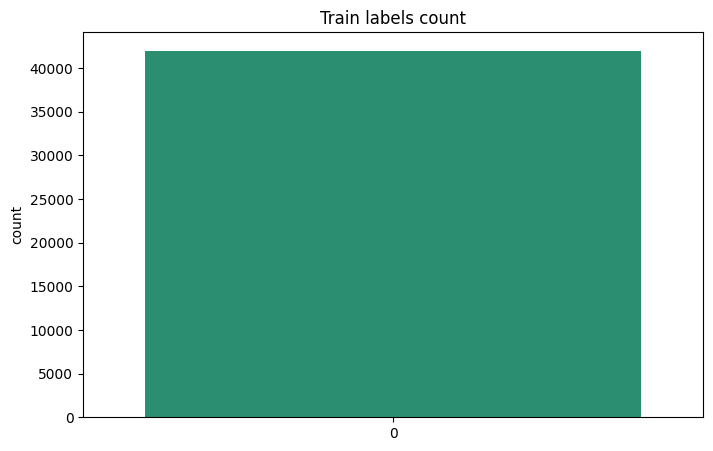

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(train['label'], palette='Dark2')
plt.title('Train labels count')
plt.show()

In [8]:
train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

<ipython-input-9-a521cfdbdeee>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


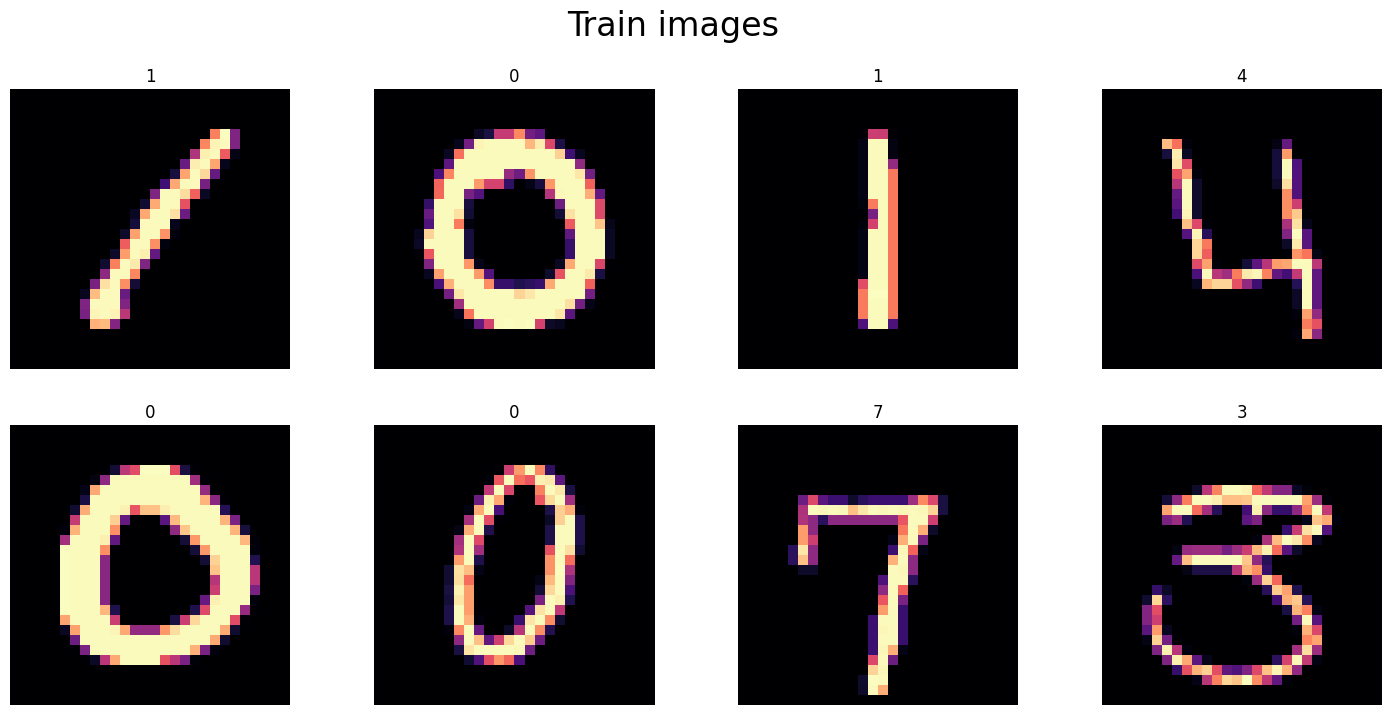

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')


<ipython-input-10-361d746d14e1>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


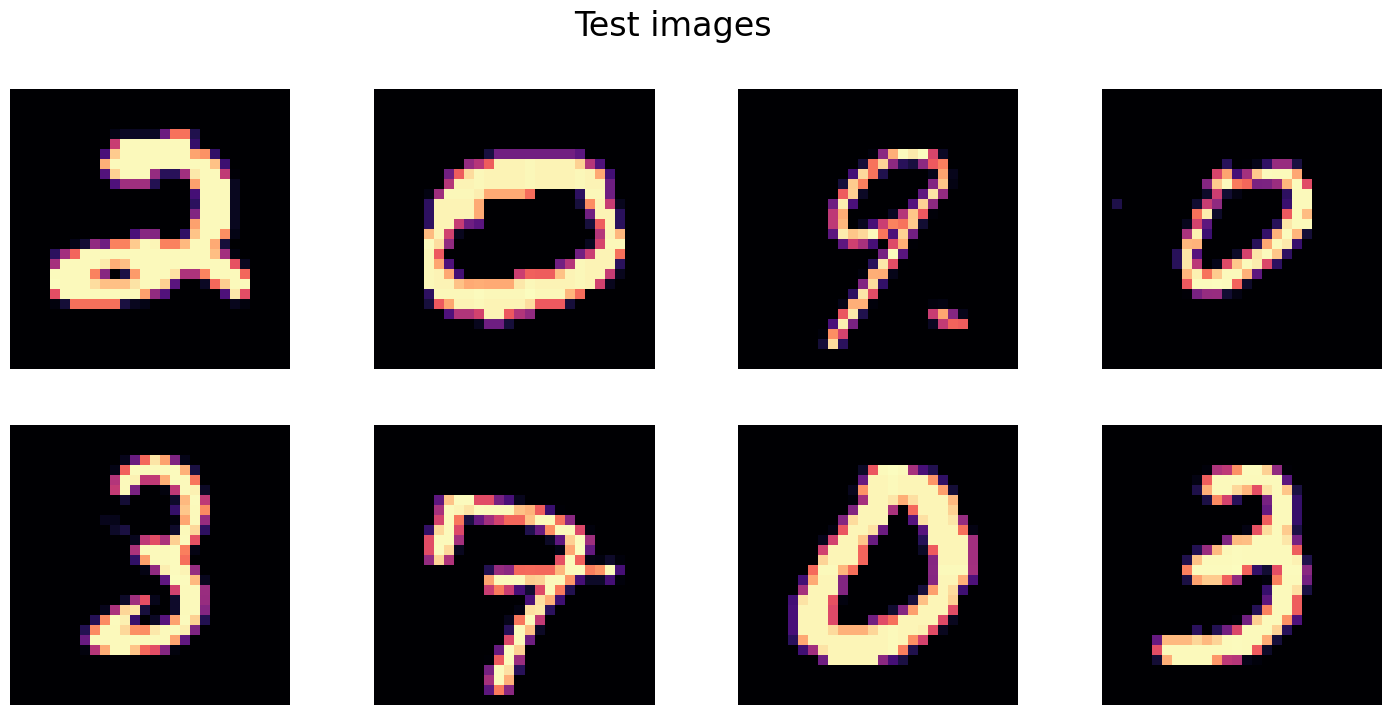

In [10]:
# first few test images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    img = row.to_numpy()[:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

In [11]:
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


In [12]:
X = X / 255.0
test = test / 255.0

In [13]:
print(X.shape)
print(test.shape)

# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
# shape of training and test dataset
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)
(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [14]:
print(y.shape)
print(y[0])
# convert Y_train to categorical by one-hot-encoding
y_enc = to_categorical(y, num_classes = 10)
# shape and values of target
print(y_enc.shape)
print(y_enc[0])

(42000,)
1
(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
random_seed = 2
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


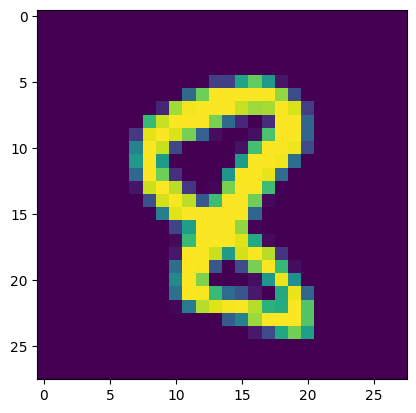

In [16]:
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


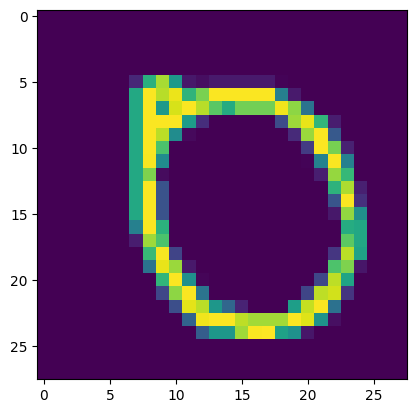

In [17]:
g = plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

# CNN


* INPUT_SHAPE = (28,28,1): Specifies the shape of input data for a neural network, where 28x28 is the size of the input image and 1 represents a single channel (grayscale).
* OUTPUT_SHAPE = 10: Defines the number of output units in the final layer of a neural network, typically corresponding to the number of classes or categories in a classification problem.
* BATCH_SIZE = 128: Determines the number of samples that will be propagated through the network at a time during training, affecting memory usage and computational efficiency.
* EPOCHS = 10: Represents the number of times the entire dataset will be passed through the network during training, impacting the number of learning iterations.
* VERBOSE = 2: Specifies the level of information displayed during training, where 0 indicates no output, 1 displays a progress bar, and 2 provides detailed logging of each epoch.

In [18]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

## What is MaxPool?
It helps in capturing the most important features while discarding redundant information, improving the network's ability to generalize and extract relevant patterns from the input data.

<img src="7.png" alt="Image Description" width ="500">

## What is Activation Function?
An activation function is a mathematical function applied to the output of a neuron or a layer in a neural network. It introduces non-linearity to the network, allowing it to learn and model complex relationships in the data.

## What is Dropout?
Dropout is a regularization technique used in neural networks to prevent overfitting and improve generalization. It involves randomly dropping out (setting to zero) a certain proportion of neurons or connections during training, effectively making the network more robust and less reliant on specific neurons.

## What is Optimizer?
Optimizers play a crucial role in the training of neural networks as they determine how the network's parameters are updated based on the computed gradients of the loss function with respect to those parameters. By iteratively updating the parameters using the gradients, optimizers guide the network towards finding the optimal set of parameters that minimize the loss and improve the network's performance.

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [22]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
161/161 - 29s - loss: 0.5605 - accuracy: 0.8240 - val_loss: 0.1291 - val_accuracy: 0.9599 - 29s/epoch - 178ms/step
Epoch 2/10
161/161 - 22s - loss: 0.1461 - accuracy: 0.9566 - val_loss: 0.0815 - val_accuracy: 0.9746 - 22s/epoch - 135ms/step
Epoch 3/10
161/161 - 20s - loss: 0.1057 - accuracy: 0.9681 - val_loss: 0.0699 - val_accuracy: 0.9776 - 20s/epoch - 124ms/step
Epoch 4/10
161/161 - 20s - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0616 - val_accuracy: 0.9804 - 20s/epoch - 122ms/step
Epoch 5/10
161/161 - 22s - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0548 - val_accuracy: 0.9833 - 22s/epoch - 137ms/step
Epoch 6/10
161/161 - 20s - loss: 0.0533 - accuracy: 0.9845 - val_loss: 0.0527 - val_accuracy: 0.9849 - 20s/epoch - 124ms/step
Epoch 7/10
161/161 - 21s - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0521 - val_accuracy: 0.9844 - 21s/epoch - 129ms/step
Epoch 8/10
161/161 - 21s - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0558 - val_accuracy: 0.9846 - 21s/epoch - 127

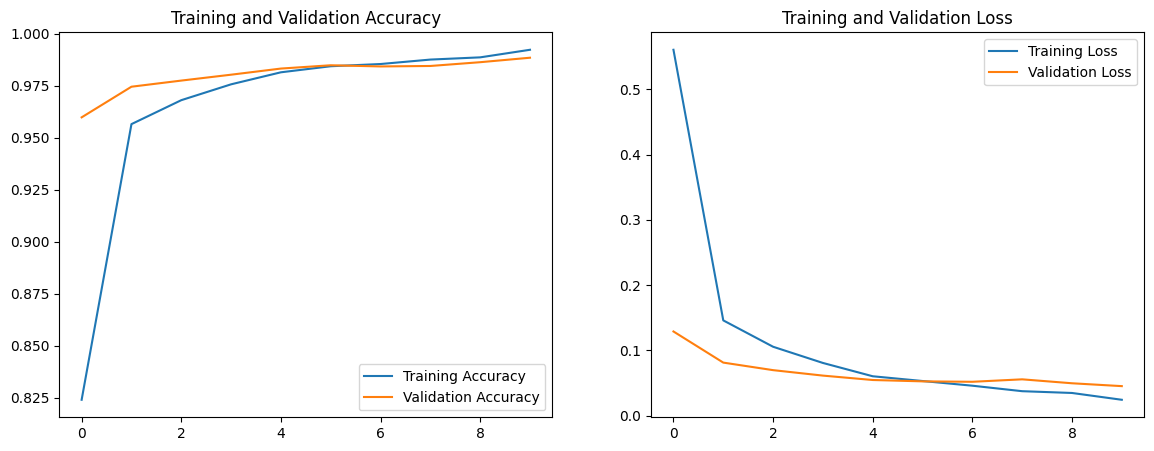

In [23]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

In [24]:
model.evaluate(X_val, y_val_enc, verbose=False)

[0.04525553062558174, 0.98801589012146]

In [25]:
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 [==============================] - 4s 9ms/step
[1.4977370e-11 8.2608700e-08 9.9999982e-01 8.4423701e-10 1.8371730e-12
 2.8667556e-14 4.9856941e-12 7.7968522e-08 9.7751818e-10 2.0069832e-14]
2


In [26]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1247
           1       0.99      0.99      0.99      1420
           2       0.98      0.99      0.98      1269
           3       0.99      0.99      0.99      1317
           4       0.99      0.99      0.99      1263
           5       0.99      0.98      0.99      1145
           6       0.99      0.99      0.99      1204
           7       0.99      0.99      0.99      1291
           8       0.98      0.98      0.98      1221
           9       0.98      0.99      0.98      1223

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



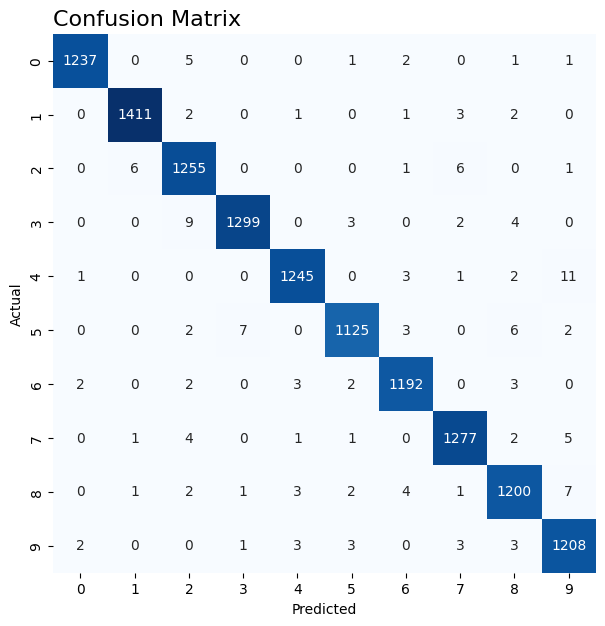

In [27]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [28]:
# predicted values
y_pred_enc = model.predict(test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

875/875 [==============================] - 10s 11ms/step
[5.3720335e-09 1.2986699e-08 9.9999970e-01 8.3795513e-09 6.8262190e-10
 1.4272601e-11 2.5762572e-09 9.6941065e-08 6.7365526e-08 1.2022500e-10]
2


<ipython-input-29-b5c856add253>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


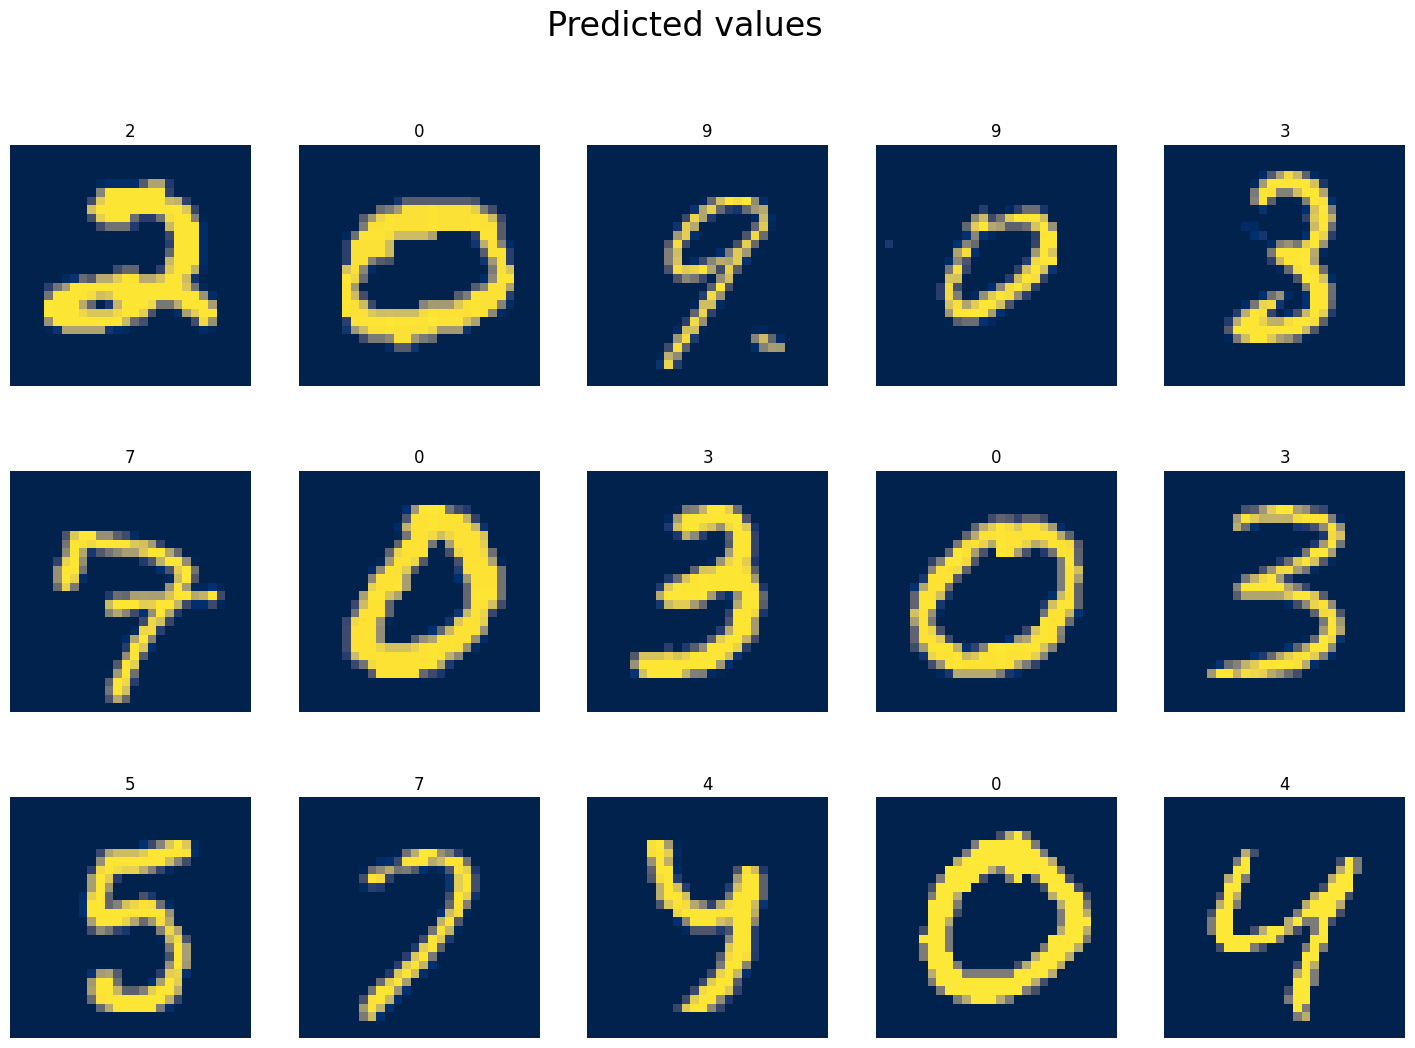

In [29]:
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

## Saving Model

In [30]:
model.save('digit_recognizer_model.h5')